In [20]:
# This method is following this example
# https://docs.microsoft.com/en-us/azure/cognitive-services/Computer-vision/QuickStarts/Python#OCR

import requests
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from matplotlib.patches import Rectangle

subscription_key = "0205e6a47acb439b90f629bd8bd041e8"
assert subscription_key

In [1]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"
image_url

'https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png'

In [4]:
vision_base_url = "https://eastus.api.cognitive.microsoft.com/vision/v1.0/"
ocr_url = vision_base_url + "ocr"
print(ocr_url)

https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr


In [9]:
# Next, call into the OCR service to get the text that was recognized, 
# and associated bounding boxes. In the following parameters, "language": "unk" 
#     automatically detects the language in the text. "detectOrientation": "true" 
#         automatically aligns the image. For more information, see the REST API documentation.
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'unk', 'detectOrientation ': 'true'}
data     = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

In [10]:
# To extract the word bounding boxes and text from the results of analysis:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]

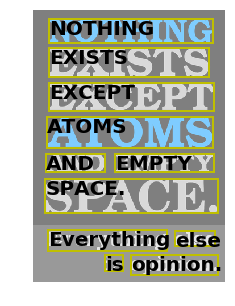

In [22]:
%matplotlib inline
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")